In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%precision 3


'%.3f'

In [5]:
import requests, zipfile
from io import StringIO
import io
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [5]:
student_data_mat = pd.read_csv('datasets/student-mat.csv', sep=';') # separater
student_data_mat.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [12]:
student_data_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
student_data_mat['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [14]:
student_data_mat['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [17]:
student_data_mat.groupby('age')['G1'].mean()

age
15    11.231707
16    10.942308
17    10.897959
18    10.719512
19    10.250000
20    13.666667
21    10.000000
22     6.000000
Name: G1, dtype: float64

In [18]:
student_data_mat.groupby('age')['G2'].mean()

age
15    11.365854
16    11.182692
17    10.479592
18    10.134146
19     9.250000
20    13.666667
21     8.000000
22     8.000000
Name: G2, dtype: float64

In [19]:
student_data_mat.groupby('age')['G3'].mean()

age
15    11.256098
16    11.028846
17    10.275510
18     9.548780
19     8.208333
20    14.000000
21     7.000000
22     8.000000
Name: G3, dtype: float64

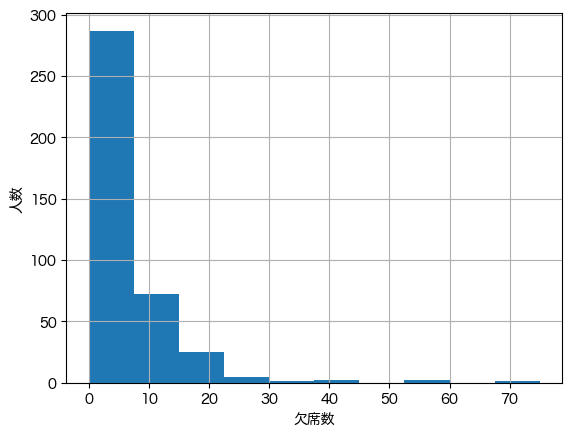

In [24]:
plt.rc('font', family='Hiragino Maru Gothic Pro')

plt.hist(student_data_mat['absences'])
plt.xlabel('欠席数')
plt.ylabel('人数')
plt.grid(True)

In [30]:
# 平均値
mean = student_data_mat['absences'].mean()
# 中央値
median = student_data_mat['absences'].median()
# 最頻値
mode = student_data_mat['absences'].mode()

"""
欠席数平均値: 5.708860759493671
欠席数中央値: 4.0
欠席数最頻値: 0
"""

print(mean, median, mode)

5.708860759493671 4.0 0    0
Name: absences, dtype: int64


In [35]:
variance = student_data_mat['absences'].var(ddof=0)
# variance
# 欠席数の分散: 63.887

std = student_data_mat['absences'].std(ddof=0) #  or np.sqrt(variance)
std
# 標準偏差: 7.993 ddof=0
#          8.003096 ddof=1

7.993

In [39]:
"""
count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
"""
student_data_mat['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [42]:
np.sqrt(student_data_mat['absences'].var(ddof=1))

8.003

In [43]:
student_data_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


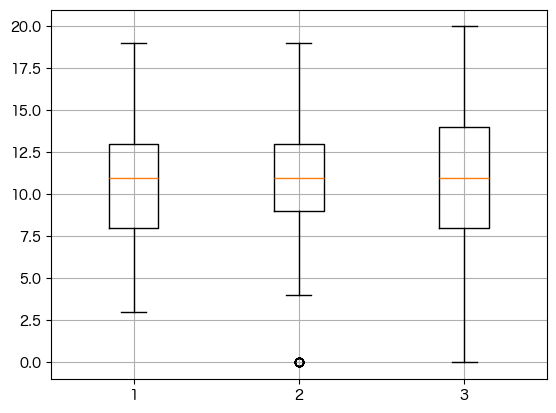

In [49]:
plt.boxplot([student_data_mat['G1'],student_data_mat['G2'],student_data_mat['G3']])
plt.grid(True)

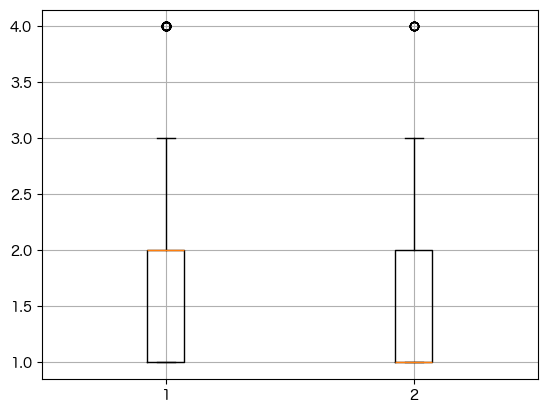

In [51]:
plt.boxplot([student_data_mat['studytime'], student_data_mat['traveltime']])
plt.grid(True)

In [82]:
# 変動係数 標準偏差/平均値
# student_data_mat.dtypes
student_data_only_num = student_data_mat.select_dtypes(include=['number','float'])
student_data_only_num.std(axis=0)/student_data_only_num.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

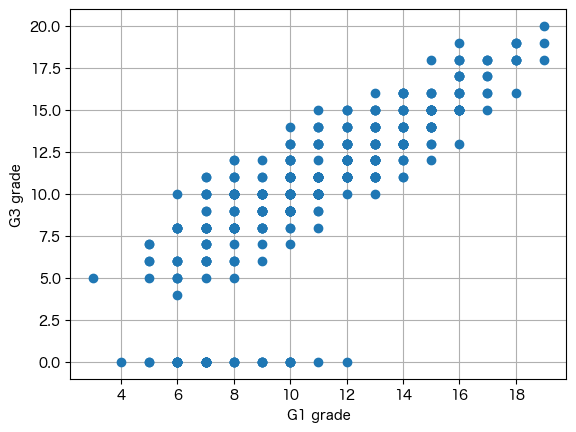

In [84]:
# グラフで表示してみると、下に成績が0という理由がよくわからないデータが散見される。これをヒアリングとかで原因を把握してどう扱うか決めたりする。
plt.plot(student_data_mat['G1'],student_data_mat['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [85]:
# 分散共分散行列
np.cov(student_data_mat['G1'], student_data_mat['G3'])


array([[11.017, 12.188],
       [12.188, 20.99 ]])

In [86]:
# ピアソン関数（相関係数）
sp.stats.pearsonr(student_data_mat['G1'], student_data_mat['G3'])

PearsonRResult(statistic=0.8014679320174142, pvalue=9.001430312276764e-90)

In [87]:
np.corrcoef([student_data_mat['G1'], student_data_mat['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

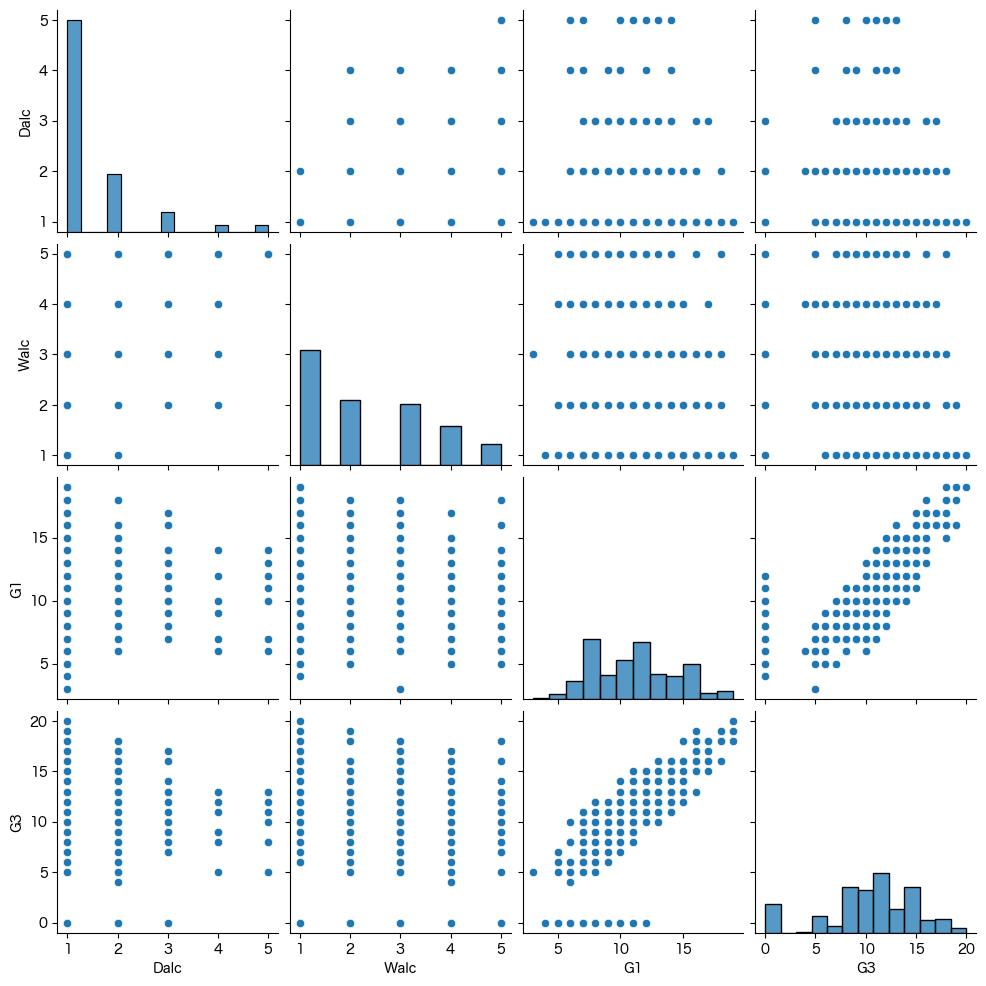

In [88]:
sns.pairplot(student_data_mat[['Dalc','Walc','G1','G3']])

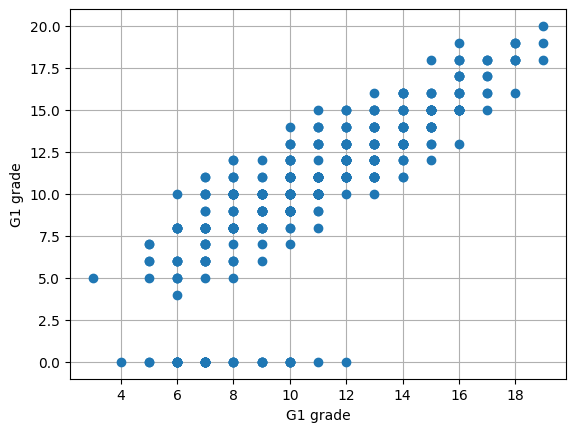

In [7]:
plt.plot(student_data_mat['G1'], student_data_mat['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G1 grade')
plt.grid(True)

In [30]:
from sklearn import linear_model

req = linear_model.LinearRegression()
X = student_data_mat.loc[:, ['G1']].values
Y = student_data_mat['G3'].values

req.fit(X,Y)
print('回帰係数:', req.coef_)
print('切片:', req.intercept_)

回帰係数: [1.106]
切片: -1.6528038288004474


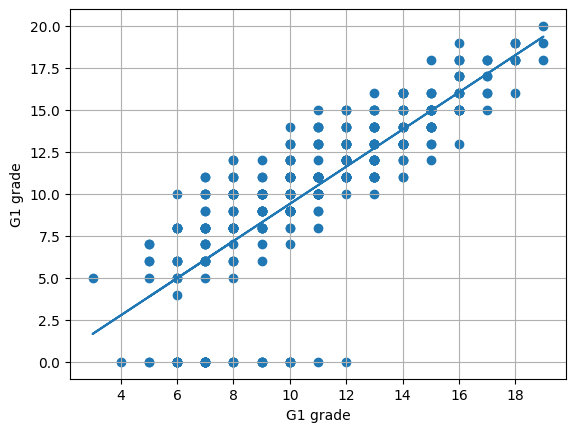

In [31]:
plt.scatter(X,Y)
plt.xlabel('G1 grade')
plt.ylabel('G1 grade')
plt.plot(X, req.predict(X))
plt.grid(True)

In [32]:
req.score(X,Y)

0.642